# ENGR 518 Project Code - Additional Experiment

In this code, we do some extra experiments:
1. Train and test in dataset 1 with different split ratio
   - **normalized histogram data** from **time series data**
2. Train and test in dataset 2 with different split ratio
   - **normalized histogram data** from **time series data**
3. Train in dataset 1, test in dataset 2
   - **normalized histogram data** from **normalized time series data**
4. Train in dataset 2, test in dataset 1
   - **normalized histogram data** from **normalized time series data**
5. Train and test in combined dataset
   - **normalized histogram data** from **normalized time series data**

# Table of Content

- [1 Import-Package](#1-Import-Package)
- [2 Data-Preprocessing](#2-Data-Preprocessing)
    - [2.1 Load-Dataset](#2.1-Load-Dataset)
    - [2.2 Split Dataset into Feature and Class](#2.2-Split-Dataset-into-Feature-and-Class)
    - [2.3 Time Series Data (Normalized) (Dataset 1)](#2.3-Time-Series-Data-(Normalized)-(Dataset-1))
    - [2.4 Time Series Data (Normalized) (Dataset 2)](#2.4-Time-Series-Data-(Normalized)-(Dataset-2))
    - [2.5 Histogram Data (Dataset 1)](#2.5-Histogram-Data-(Dataset-1))
    - [2.6 Histogram Data (Dataset 2)](#2.6-Histogram-Data-(Dataset-2))
    - [2.7 Histogram Data (Normalized) (Dataset 1)](#2.7-Histogram-Data-(Normalized)-(Dataset-1))
    - [2.8 Histogram Data (Normalized) (Dataset 2)](#2.8-Histogram-Data-(Normalized)-(Dataset-2))
- [3 Experiment](#3-Experiment)
    - [3.1 Split Dataset into Train and Test](#3.1-Split-Dataset-into-Train-and-Test)
    - [3.2 Logistic Regression in Scikit-Learn](#3.2-Logistic-Regression-in-Scikit-Learn)

# 1 Import Package

```
conda install autograd # numpy
conda install matplotlib
conda install pandas
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install pywavelets
```

In [1]:
import time

import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt
import torch

from autograd import grad
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neural_network import MLPClassifier
from torch import nn

# 2 Data Preprocessing
- [2.1 Load-Dataset](#2.1-Load-Dataset)
- [2.2 Split Dataset into Feature and Class](#2.2-Split-Dataset-into-Feature-and-Class)
- [2.3 Time Series Data (Normalized) (Dataset 1)](#2.3-Time-Series-Data-(Normalized)-(Dataset-1))
- [2.4 Time Series Data (Normalized) (Dataset 2)](#2.4-Time-Series-Data-(Normalized)-(Dataset-2))
- [2.5 Histogram Data (Dataset 1)](#2.5-Histogram-Data-(Dataset-1))
- [2.6 Histogram Data (Dataset 2)](#2.6-Histogram-Data-(Dataset-2))
- [2.7 Histogram Data (Normalized) (Dataset 1)](#2.7-Histogram-Data-(Normalized)-(Dataset-1))
- [2.8 Histogram Data (Normalized) (Dataset 2)](#2.8-Histogram-Data-(Normalized)-(Dataset-2))

## 2.1 Load Dataset

In [2]:
# Load Dataset
dataset_1_path = "Data/pressure_data.xls"
dataset_1_df   = pd.read_excel(dataset_1_path, header=None)
dataset_1      = np.asarray(dataset_1_df)

dataset_2_path = "Data/pressure_data_raw.xls"
dataset_2_df   = pd.read_excel(dataset_2_path, header=None)
dataset_2      = np.asarray(dataset_2_df)

## 2.2 Split Dataset into Feature and Class

In [3]:
# Split Dataset into Features and Class
x_1_raw = dataset_1[:,1:] # chamber pressure data in an interval of time
y_1_raw = dataset_1[:,0]  # chamber quality  data

x_2_raw = dataset_2[:,1:] # chamber pressure data in an interval of time
y_2_raw = dataset_2[:,0]  # chamber quality  data

print("dataset 1")
print("\tchamber pressure data shape: ", x_1_raw.shape)
print("\tchamber quality  data shape: ", y_1_raw.shape)
print("\tx_1_raw.shape= %-10s, x_1_raw.max= %5.2f, x_1_raw.min= %5.2f" % (x_1_raw.shape, np.max(x_1_raw), np.min(x_1_raw)))
print("\ty_1_raw.shape= %-10s, y_1_raw.max= %5.2f, y_1_raw.min= %5.2f" % (y_1_raw.shape, np.max(y_1_raw), np.min(y_1_raw)))
print()
print("dataset 2")
print("\tchamber pressure data shape: ", x_2_raw.shape)
print("\tchamber quality  data shape: ", y_2_raw.shape)
print("\tx_2_raw.shape= %-10s, x_2_raw.max= %5.2f, x_2_raw.min= %5.2f" % (x_2_raw.shape, np.max(x_2_raw), np.min(x_2_raw)))
print("\ty_2_raw.shape= %-10s, y_2_raw.max= %5.2f, y_2_raw.min= %5.2f" % (y_2_raw.shape, np.max(y_2_raw), np.min(y_2_raw)))

dataset 1
	chamber pressure data shape:  (154, 201)
	chamber quality  data shape:  (154,)
	x_1_raw.shape= (154, 201), x_1_raw.max=  0.08, x_1_raw.min= -0.08
	y_1_raw.shape= (154,)    , y_1_raw.max=  1.00, y_1_raw.min=  0.00

dataset 2
	chamber pressure data shape:  (154, 201)
	chamber quality  data shape:  (154,)
	x_2_raw.shape= (154, 201), x_2_raw.max=  0.17, x_2_raw.min= -0.16
	y_2_raw.shape= (154,)    , y_2_raw.max=  1.00, y_2_raw.min=  0.00


## 2.3 Time Series Data (Normalized) (Dataset 1)

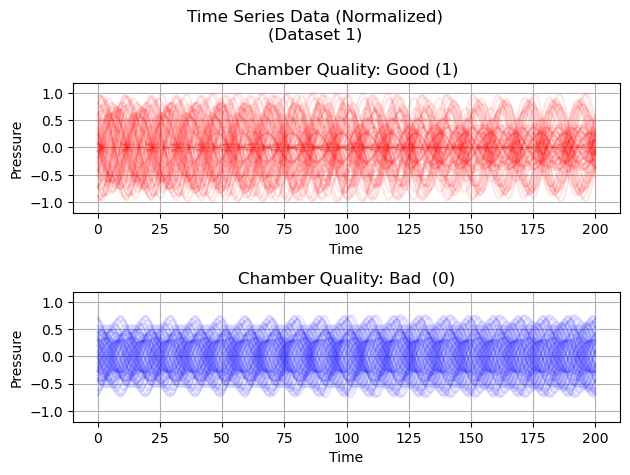

In [20]:
x_1_norm = x_1_raw / np.max(np.abs(x_1_raw))

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Time Series Data (Normalized)\n(Dataset 1)")

ylim_max = np.max(x_1_norm)*1.2
ylim_min = np.min(x_1_norm)*1.2

ax[0].plot(x_1_norm[y_1_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Pressure")
ax[0].set_ylim([ylim_min, ylim_max])
ax[0].set_yticks(np.arange(-1, 1.5, 0.5))
ax[0].grid()

ax[1].plot(x_1_norm[y_1_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Pressure")
ax[1].set_ylim([ylim_min, ylim_max])
ax[1].set_yticks(np.arange(-1, 1.5, 0.5))
ax[1].grid()

plt.tight_layout()

## 2.4 Time Series Data (Normalized) (Dataset 2)

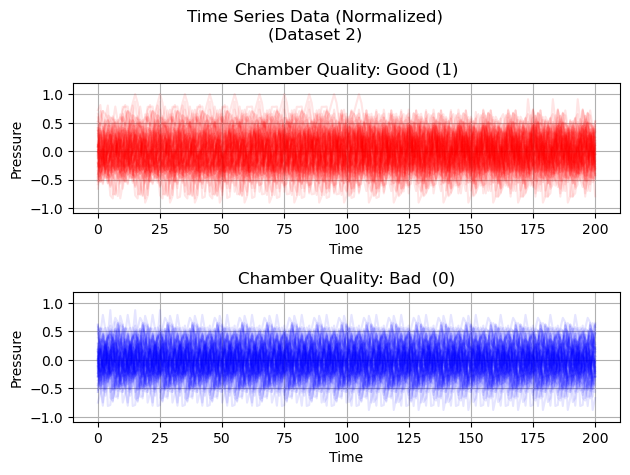

In [19]:
x_2_norm = x_2_raw / np.max(np.abs(x_2_raw))

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Time Series Data (Normalized)\n(Dataset 2)")

ylim_max = np.max(x_2_norm)*1.2
ylim_min = np.min(x_2_norm)*1.2

ax[0].plot(x_2_norm[y_2_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Pressure")
ax[0].set_ylim([ylim_min, ylim_max])
ax[0].set_yticks(np.arange(-1, 1.5, 0.5))
ax[0].grid()

ax[1].plot(x_2_norm[y_2_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Pressure")
ax[1].set_ylim([ylim_min, ylim_max])
ax[1].set_yticks(np.arange(-1, 1.5, 0.5))
ax[1].grid()

plt.tight_layout()

## 2.5 Histogram Data (Dataset 1)

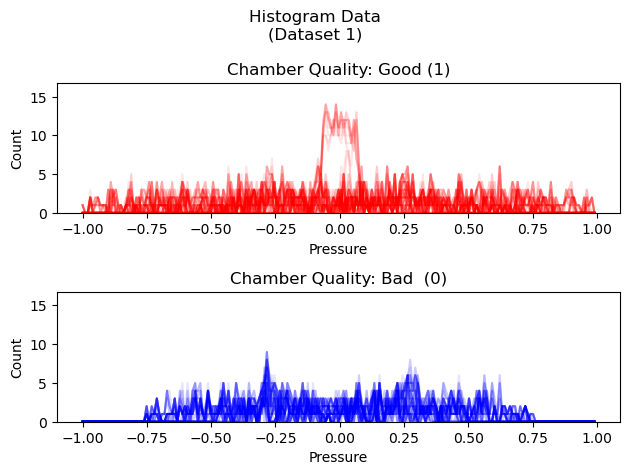

In [21]:
x_1_norm_bins = np.linspace(-1, 1, num=202)
x_1_norm_hist = np.apply_along_axis(lambda t: np.histogram(t, bins=x_1_norm_bins)[0], 1, x_1_norm)

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data\n(Dataset 1)")

ylim_max = np.max(x_1_norm_hist)*1.2
ylim_min = 0

ax[0].plot(x_1_norm_bins[:-1], x_1_norm_hist[y_1_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_1_norm_bins[:-1], x_1_norm_hist[y_1_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

## 2.6 Histogram Data (Dataset 2)

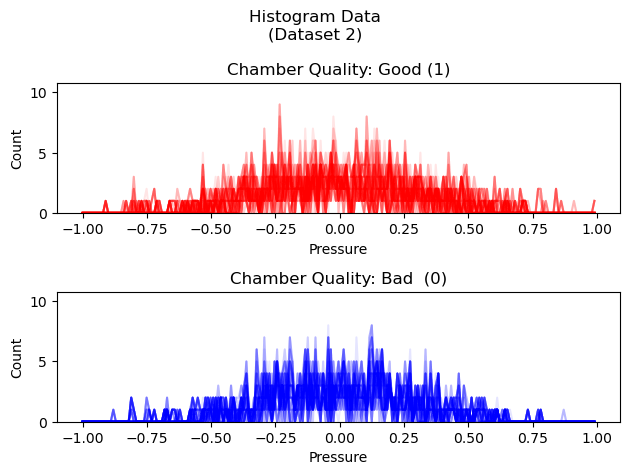

In [22]:
x_2_norm_bins = np.linspace(-1, 1, num=202)
x_2_norm_hist = np.apply_along_axis(lambda t: np.histogram(t, bins=x_2_norm_bins)[0], 1, x_2_norm)

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data\n(Dataset 2)")

ylim_max = np.max(x_2_norm_hist)*1.2
ylim_min = 0

ax[0].plot(x_2_norm_bins[:-1], x_2_norm_hist[y_2_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_2_norm_bins[:-1], x_2_norm_hist[y_2_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

## 2.7 Histogram Data (Normalized) (Dataset 1)

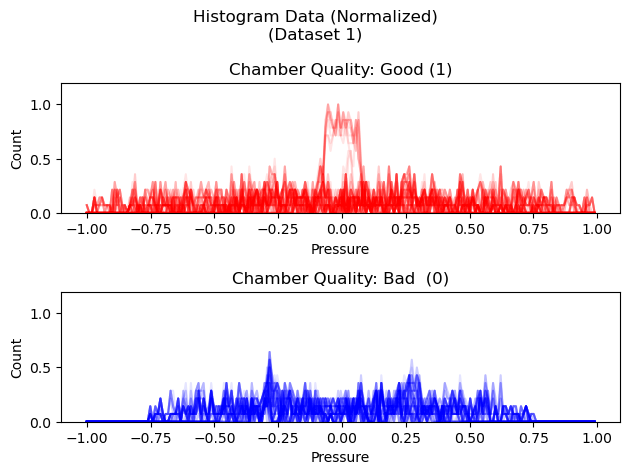

In [24]:
x_1_norm_hist_max = np.max(x_1_norm_hist)
x_1_norm_hist_norm = x_1_norm_hist / x_1_norm_hist_max

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data (Normalized)\n(Dataset 1)")

ylim_max = np.max(x_1_norm_hist_norm)*1.2
ylim_min = 0

ax[0].plot(x_1_norm_bins[:-1], x_1_norm_hist_norm[y_1_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_1_norm_bins[:-1], x_1_norm_hist_norm[y_1_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

## 2.8 Histogram Data (Normalized) (Dataset 2)

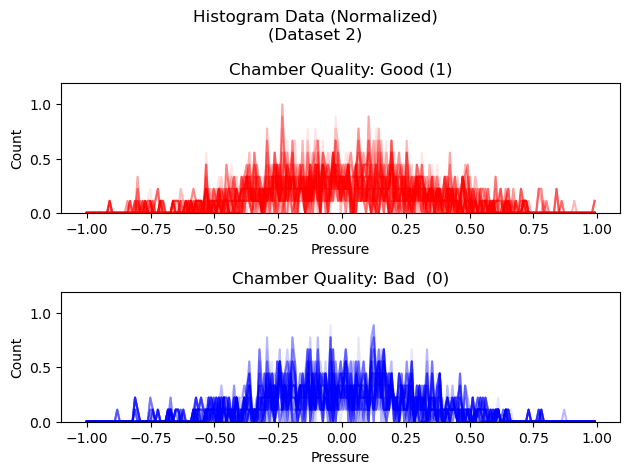

In [26]:
x_2_norm_hist_max = np.max(x_2_norm_hist)
x_2_norm_hist_norm = x_2_norm_hist / x_2_norm_hist_max

# ----
# Plot
# ----

fig, ax = plt.subplots(2, 1)

fig.suptitle("Histogram Data (Normalized)\n(Dataset 2)")

ylim_max = np.max(x_2_norm_hist_norm)*1.2
ylim_min = 0

ax[0].plot(x_2_norm_bins[:-1], x_2_norm_hist_norm[y_2_raw==1].T, "r", alpha=0.1)
ax[0].set_title("Chamber Quality: Good (1)")
ax[0].set_xlabel("Pressure")
ax[0].set_ylabel("Count")
ax[0].set_ylim([ylim_min, ylim_max])


ax[1].plot(x_2_norm_bins[:-1], x_2_norm_hist_norm[y_2_raw==0].T, "b", alpha=0.1)
ax[1].set_title("Chamber Quality: Bad  (0)")
ax[1].set_xlabel("Pressure")
ax[1].set_ylabel("Count")
ax[1].set_ylim([ylim_min, ylim_max])

plt.tight_layout()

# 3 Experiment
- [3.1 Split Dataset into Train and Test](#3.1-Split-Dataset-into-Train-and-Test)
- [3.2 Logistic Regression in Scikit-Learn](#3.2-Logistic-Regression-in-Scikit-Learn)

## 3.1 Split Dataset into Train and Test

In [35]:
def split_dataset(x, y, split_ratio=0.9, verbose=True):
    # Shuffle Dataset
    class_0_idx = np.where(y==0)[0]
    class_1_idx = np.where(y==1)[0]

    # np.random.seed(0) # control the shuffle result
    np.random.shuffle(class_0_idx)
    np.random.shuffle(class_1_idx)

    # Split Dataset into Train and Test
    class_0_num_train = round(len(class_0_idx) * split_ratio)
    class_0_idx_train = class_0_idx[:class_0_num_train]
    class_0_idx_test  = class_0_idx[class_0_num_train:]

    class_1_num_train = round(len(class_1_idx) * split_ratio)
    class_1_idx_train = class_1_idx[:class_1_num_train]
    class_1_idx_test  = class_1_idx[class_1_num_train:]
    
    if verbose:
        print("Split class 0 into => %s:%s" % (len(class_0_idx_train), len(class_0_idx_test)))
        print("Split class 1 into => %s:%s" % (len(class_1_idx_train), len(class_1_idx_test)))

    x_train = np.concatenate((x[class_0_idx_train], x[class_1_idx_train]), axis=0)
    y_train = np.concatenate((y[class_0_idx_train], y[class_1_idx_train]), axis=0)

    x_test  = np.concatenate((x[class_0_idx_test],  x[class_1_idx_test]),  axis=0)
    y_test  = np.concatenate((y[class_0_idx_test],  y[class_1_idx_test]),  axis=0)

    if verbose:
        print("Split dataset into => %s:%s" % (len(y_train), len(y_test)))

        print("")
        print("x_train: %10s, max: %5.2f, min: %5.2f" % (x_train.shape, np.max(x_train), np.min(x_train)))
        print("x_test:  %10s, max: %5.2f, min: %5.2f" % (x_test.shape,  np.max(x_test),  np.min(x_test)))

        print("y_train: %10s, max: %5.2f, min: %5.2f" % (y_train.shape, np.max(y_train), np.min(y_train)))
        print("y_test:  %10s, max: %5.2f, min: %5.2f" % (y_test.shape,  np.max(y_test),  np.min(y_test)))
    
    return x_train, y_train, x_test, y_test

## 3.2 Logistic Regression in Scikit-Learn


Average Iteration Num: 18.6980
Average Training Time: 0.1338s

Average Accuracy: 0.9694
Average Accuracy STD: 0.0256


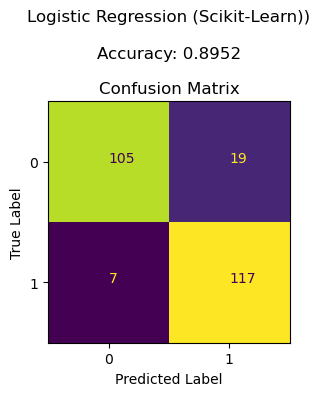

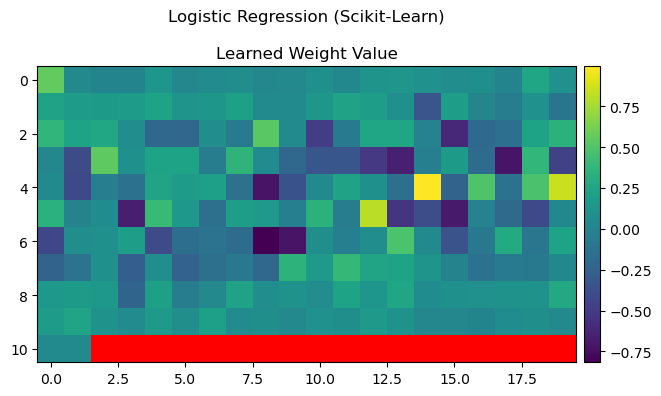

In [83]:
# experiment_no = 1
# experiment_no = 2
# experiment_no = 3
# experiment_no = 4
experiment_no = 5

split_ratio = 0.2

history_iteration_num = []
history_training_time = []
history_accuracy = []

# experiment_num = 1
experiment_num = 500
for i in range(experiment_num):

    if experiment_no == 1:
        x_train, y_train, x_test, y_test = split_dataset(
            x_1_norm_hist_norm, 
            y_1_raw, 
            split_ratio=split_ratio,
            verbose=(experiment_num==1)
        )
    
    elif experiment_no == 2:
        x_train, y_train, x_test, y_test = split_dataset(
            x_2_norm_hist_norm, 
            y_2_raw, 
            split_ratio=split_ratio,
            verbose=(experiment_num==1)
        )
    
    elif experiment_no == 3:
        x_train, y_train = x_1_norm_hist_norm, y_1_raw
        x_test,  y_test  = x_2_norm_hist_norm, y_2_raw

    elif experiment_no == 4:
        x_train, y_train = x_2_norm_hist_norm, y_2_raw
        x_test,  y_test  = x_1_norm_hist_norm, y_1_raw

    elif experiment_no == 5:
        x_train_1, y_train_1, x_test_1, y_test_1 = split_dataset(
            x_1_norm_hist_norm, 
            y_1_raw, 
            split_ratio=split_ratio,
            verbose=(experiment_num==1)
        )
        x_train_2, y_train_2, x_test_2, y_test_2 = split_dataset(
            x_2_norm_hist_norm, 
            y_2_raw, 
            split_ratio=split_ratio,
            verbose=(experiment_num==1)
        )
        x_train = np.concatenate([x_train_1, x_train_2], axis=0)
        y_train = np.concatenate([y_train_1, y_train_2], axis=0)
        x_test = np.concatenate([x_test_1, x_test_2], axis=0)
        y_test = np.concatenate([y_test_1, y_test_2], axis=0)

    else:
        raise Exception("Wrong Input")

    _time = time.time()
    classifier = LogisticRegression(max_iter=5000)
    classifier.fit(x_train, y_train.reshape(-1))
    training_time = time.time()-_time
    
    iteration_num = classifier.n_iter_[0]
    if experiment_num == 1:
        print()
        print("Iteration Number: %s" % iteration_num)
        print("Training Time: %.4fs" % training_time)

    y_pred = classifier.predict(x_test).reshape(-1, 1)

    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)

    if experiment_num == 1:
        print()
        print("Confusion Matrix:")
        print(cm)

        print()
        print("Accuracy: %.4f" % ac)

    history_iteration_num.append(iteration_num)
    history_training_time.append(training_time)
    history_accuracy.append(ac)

if experiment_num != 1:
    avg_iteration_num = np.mean(history_iteration_num)
    avg_training_time = np.mean(history_training_time)
    avg_accuracy = np.mean(history_accuracy)

    print()
    print("Average Iteration Num: %.4f" % avg_iteration_num)
    print("Average Training Time: %.4fs" % avg_training_time)
    print()
    print("Average Accuracy: %.4f" % avg_accuracy)
    print("Average Accuracy STD: %.4f" % np.std(history_accuracy))

# ----
# Plot Confusion Matrix
# ----

fig, ax = plt.subplots(1, 1, figsize=(6,4))

fig.suptitle("Logistic Regression (Scikit-Learn))")

ax.set_title("Accuracy: %.4f\n\nConfusion Matrix" % ac)

im = ax.imshow(cm)
cmap_min, cmap_max = im.cmap(0), im.cmap(1.0)
thresh = (cm.max() + cm.min()) / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = cmap_max if cm[i, j] < thresh else cmap_min
        ax.text(j, i, cm[i, j], color=color)

ax.set(
    xticks=np.arange(cm.shape[0]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=range(cm.shape[0]),
    yticklabels=range(cm.shape[0]),
    ylabel="True Label",
    xlabel="Predicted Label",
)

plt.tight_layout()

# ----
# Plot Weight Heatmap
# ----

fig, ax = plt.subplots(1, 1, figsize=(8,4))

fig.suptitle("Logistic Regression (Scikit-Learn)")

ax.set_title("Learned Weight Value")

imshow_w_learned = np.concatenate([classifier.intercept_, classifier.coef_.reshape(-1)])

imshow_width = 20
if len(imshow_w_learned)%imshow_width != 0:
    imshow_na = np.empty(imshow_width-len(imshow_w_learned)%imshow_width)
    imshow_na[:] = np.nan
    imshow_w_learned = np.concatenate((imshow_w_learned, imshow_na))

cmap = plt.get_cmap("viridis")
cmap.set_bad("red", 1.)

im = ax.imshow(imshow_w_learned.reshape(-1, imshow_width), cmap=cmap)

plt.tight_layout()

cax = fig.add_axes([
    ax.get_position().x1 + 0.01,                # left
    ax.get_position().y0,                       # bottom
    0.02,                                       # width
    ax.get_position().y1 - ax.get_position().y0 # height
])
cbar = fig.colorbar(im, cax=cax)